# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  # 회귀 모델을 사용할 경우
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import RandomizedSearchCV

import lightgbm as lgb

import warnings

warnings.filterwarnings(action='ignore')


### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [32]:
file1 = 'data2.pkl'

In [33]:
data = joblib.load(file1)

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [34]:
data.columns

Index(['Date_x', 'car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'weekday', 'month', 'week', 'year', 'target', 'Date_y',
       'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'weekday_name', 'season',
       'holiday', 'moving_average_7', 'ride_raio'],
      dtype='object')

In [35]:
data.isna().sum()

Date_x              0
car_cnt             0
request_cnt         0
ride_cnt            0
waiting_time        0
fare                0
distance            0
weekday             0
month               0
week                0
year                0
target              0
Date_y              0
temp_max            0
temp_min            0
rain(mm)            0
humidity_max(%)     0
humidity_min(%)     0
sunshine(MJ/m2)     0
weekday_name        0
season              0
holiday             0
moving_average_7    0
ride_raio           0
dtype: int64

### (2) 가변수화

In [36]:
drop_col = ['car_cnt', 'ride_cnt', 'fare' ,'distance', 'weekday', 'Date_y', 'Date_x', 'month', 'week', 'year', 'weekday_name', 'season']
data.drop(columns=drop_col, axis=1, inplace=True)

In [37]:
# dumm_cols = ['month', 'week', 'year', 'weekday_name', 'season', 'holiday']
dumm_cols = ['holiday']
# # 가변수화
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True)

In [38]:
# drop_col = ['month', 'week', 'year', 'weekday_name', 'season', 'holiday']
# data.drop(columns=drop_col, axis=1, inplace=True)


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [39]:
target = 'target'

#### 1) x, y 나누기

In [40]:
x = data.drop(target, axis=1)
y = data.loc[:, target]

# x_nk = data_nk.drop(target, axis=1)
# y_nk = data_nk.loc[:, target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, shuffle=False, random_state=1)

In [42]:
x_train.columns

Index(['request_cnt', 'waiting_time', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       'moving_average_7', 'ride_raio', 'holiday_1'],
      dtype='object')

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [43]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

### (1) 머신러닝

#### 1) 모델1

In [44]:
# 2단계: 선언하기
model = KNeighborsRegressor(n_neighbors=5)

In [45]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsRegressor()

In [46]:
# 4단계 예측하기
y_pred = model.predict(x_test)

In [47]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

MAE: 4.776818181818182
MAPE:  0.11390399079167182


#### 2) 모델2

In [48]:
# 2단계: 선언하기
model_2 = LinearRegression()

In [49]:
# 3단계: 학습하기
model_2.fit(x_train, y_train)

LinearRegression()

In [50]:
# 4단계: 예측하기
y_pred = model_2.predict(x_test)

In [51]:
y_pred.shape[0]

88

In [52]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))


MAE: 4.416630783271665
MAPE:  0.10815565491996994


#### 3) 모델3

In [867]:
param = {
    'n_estimators': range(1, 100, 5), 
    'max_depth': range(0, 30,10), 
    'min_samples_split': range(2, 10, 2), 
    'min_samples_leaf': range(1, 5), 
    'max_features': ['auto', 'sqrt']
}

In [782]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

#기본모델 선언
rs_model = RandomForestRegressor()


# Random Search 선언
model =RandomizedSearchCV(rs_model,
                          param,
                         cv=3,
                         n_iter=20)

model.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': range(0, 30, 10),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(1, 100, 5)})

In [783]:
print(model.cv_results_)
print(model.best_params_)
print(model.best_score_)

{'mean_fit_time': array([3.33547592e-04, 5.56525230e-01, 2.02746193e+00, 7.96635389e-01,
       5.98123312e-01, 6.27888680e-01, 2.67159343e+00, 1.27095302e-01,
       1.55357099e+00, 4.21168804e-02, 3.40143840e-04, 9.13080215e-01,
       1.02074941e-03, 6.46804810e-01, 2.17153231e-02, 7.53720601e-03,
       5.15699387e-04, 1.04141235e-03, 1.08712117e-01, 8.78252983e-02]), 'std_fit_time': array([4.71707529e-04, 7.23333723e-02, 1.08318291e-01, 1.78605440e-02,
       2.80517197e-02, 8.72153114e-02, 1.45840073e-02, 1.56314006e-02,
       5.20506512e-02, 4.69465011e-04, 4.81036031e-04, 5.87127487e-02,
       4.91845195e-05, 1.80590451e-02, 3.77999322e-04, 4.81489939e-04,
       4.22337814e-04, 7.07860974e-05, 9.18247558e-03, 1.17993566e-02]), 'mean_score_time': array([0.        , 0.01753227, 0.01977722, 0.01229978, 0.01570805,
       0.02420982, 0.02421355, 0.00350952, 0.01704733, 0.00295973,
       0.        , 0.01341033, 0.        , 0.00832423, 0.00117294,
       0.00164994, 0.        , 0

In [837]:
# 최적
model = RandomForestRegressor(n_estimators=300, random_state=42, max_depth = 5, max_features='auto')
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=300,
                      random_state=42)

In [838]:
y_pred = model.predict(x_test)
print('MAE:', mean_squared_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

MAE: 33.06089724541442
MAPE:  0.10662170493989546


#### 4) 모델4

In [839]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from sklearn.ensemble import GradientBoostingClassifier  # 분류 모델을 사용할 경우
# 또는
from sklearn.ensemble import GradientBoostingRegressor  # 회귀 모델을 사용할 경우
from sklearn.model_selection import train_test_split 

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)



In [840]:
# Test 데이터로 성능을 평가해보세요.
print('MAE:', mean_squared_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

MAE: 32.75837029543748
MAPE:  0.10766196036573895


#### 5) 모델5

In [841]:
model = DecisionTreeRegressor(max_depth=5)


model.fit(x_train , y_train)


y_pred= model.predict(x_test)


print('MAE: ', mean_absolute_error(y_test , y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

MAE:  5.310568828009892
MAPE:  0.12638644253705938


#### 6) 모델6

In [789]:
data = joblib.load(file1)

drop_col = ['car_cnt', 'ride_cnt', 'fare' ,'distance', 'weekday', 'Date_y', 'month', 'week', 'year', 'weekday_name', 'season']
data.drop(columns=drop_col, axis=1, inplace=True)

dumm_cols = ['holiday']
# # 가변수화
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True)

x = data.drop(target, axis=1)
y = data.loc[:, target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)


# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
import pandas as pd
import statsmodels.api as sm


# Exponential Smoothing 모델 생성 및 적용

x_train['Date_x'] = x_train.index

model = sm.tsa.ExponentialSmoothing(x_train['Date_x'] , trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()

# 예측값을 데이터프레임에 추가
x_train['predicted'] = results.fittedvalues



x_test['Date_x'] = x_test.index

model = sm.tsa.ExponentialSmoothing(x_test['Date_x'], trend='add', seasonal='add', seasonal_periods=3)
results = model.fit()

x_test['predicted'] = results.fittedvalues



drop_col = ['Date_x']
x_train.drop(columns=drop_col, axis=1, inplace=True)
x_test.drop(columns=drop_col, axis=1, inplace=True)




from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(x_train, y_train)


y_pred = model.predict(x_test)


print('MAE:', mean_squared_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

MAE: 47.408908089165074
MAPE:  0.19775516604639362


### 7) 모델 7

In [790]:
# LightGBM 모델 생성
model = lgb.LGBMRegressor(
    boosting_type='gbdt',  # 부스팅 유형 설정 (기본값: 'gbdt')
    num_leaves=31,  # 트리의 최대 리프 노드 수 (기본값: 31)
    learning_rate=0.05,  # 학습률 (기본값: 0.05)
    n_estimators=100,  # 트리의 개수 (기본값: 100)
    objective='regression',  # 회귀 목적 함수 설정
    # metric='mse'  # 성능 측정 지표 설정 (평균 제곱 오차, 기본값: 'mse')
)

# 모델 훈련
model.fit(x_train, y_train)

# 예측
y_pred = model.predict(x_test)

print('MAE:', mean_squared_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 2044, number of used features: 12
[LightGBM] [Info] Start training from score 43.513160
MAE: 32.63093910345483
MAPE:  0.14285305000851237


## 성능 시각화 - 모델 2

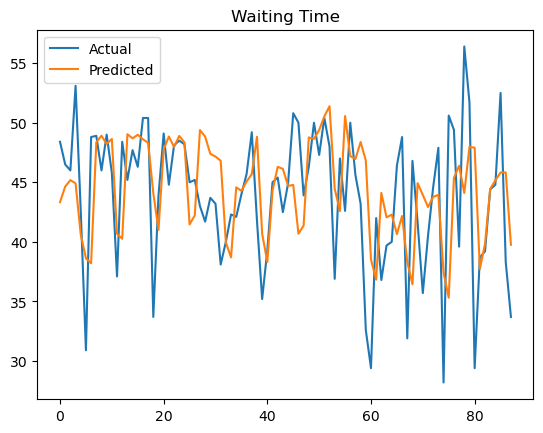

MAE : 4.417


In [53]:
# 모델 2번 시각화 - LinearRegression
final_model = model_2

y_pred = final_model.predict(x_test)
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Waiting Time')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE : {round(mae,3)}')

### (2) 딥러닝

In [8]:
df = joblib.load('data2_u.pkl')

### (1) NA 조치

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2920
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2921 non-null   datetime64[ns]
 1   car_cnt           2921 non-null   int64         
 2   request_cnt       2921 non-null   int64         
 3   ride_cnt          2921 non-null   int64         
 4   waiting_time      2921 non-null   float64       
 5   fare              2921 non-null   int64         
 6   distance          2921 non-null   int64         
 7   weekday           2921 non-null   category      
 8   month             2921 non-null   category      
 9   week              2921 non-null   category      
 10  year              2921 non-null   category      
 11  target            2921 non-null   float64       
 12  temp_max          2921 non-null   float64       
 13  temp_min          2921 non-null   float64       
 14  rain(mm)          2921 n

### (2) 가변수화

In [10]:
dumm_cols = ['weekday', 'month', 'year']
df = pd.get_dummies(df, columns=dumm_cols, drop_first=True)

#### 1) x, y 나누기

In [11]:
df.loc[df['Date'] == '2022-10',:].index

Int64Index([2830], dtype='int64')

In [12]:
test_start = 2830

In [13]:
removed_cols = ['Date', 'week', 'is_holiday']
# removed_cols = ['Date', 'week', 'season', 'holiday_yn']
x = df.drop(removed_cols, axis=1)
y = df.loc[:, 'target']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [14]:
from sklearn.model_selection import train_test_split
x_train = x.iloc[:test_start,:]
x_test = x.iloc[test_start:,:]
y_train = y[:test_start]
y_test = y[test_start:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2830, 40), (91, 40), (2830,), (91,))

In [15]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=1)
# x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 0 to 2829
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_cnt           2830 non-null   int64  
 1   request_cnt       2830 non-null   int64  
 2   ride_cnt          2830 non-null   int64  
 3   waiting_time      2830 non-null   float64
 4   fare              2830 non-null   int64  
 5   distance          2830 non-null   int64  
 6   target            2830 non-null   float64
 7   temp_max          2830 non-null   float64
 8   temp_min          2830 non-null   float64
 9   rain(mm)          2830 non-null   float64
 10  humidity_max(%)   2830 non-null   float64
 11  humidity_min(%)   2830 non-null   float64
 12  sunshine(MJ/m2)   2830 non-null   float64
 13  ave_waiting_time  2830 non-null   float64
 14  ride_rate         2830 non-null   float64
 15  weekday_1         2830 non-null   uint8  
 16  weekday_2         2830 non-null   uint8  


### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [18]:
!pip install tensorflow

In [19]:
import tensorflow as tf

#### 1) 모델1

In [20]:
x_train.shape

(2830, 40)

In [21]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

X = tf.keras.Input(shape=[x_train.shape[1]])

H = tf.keras.layers.Dense(64)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(16)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.3)(H)
Y = tf.keras.layers.Dense(1)(H)

model1 = tf.keras.Model(X, Y)
model1.compile(loss='mae')
# model1.summary()

In [22]:
model1.fit(x_train, y_train, epochs=500, batch_size=128, 
          validation_split=0.2, verbose=0)
model1.fit(x_train, y_train, epochs=10,  batch_size=128, validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 0s 19ms/step - loss: 7.2885 - val_loss: 2.2507
Epoch 2/10
18/18 [==============================] - 0s 14ms/step - loss: 7.6864 - val_loss: 7.1705
Epoch 3/10
18/18 [==============================] - 0s 13ms/step - loss: 7.3701 - val_loss: 3.7411
Epoch 4/10
18/18 [==============================] - 0s 13ms/step - loss: 7.3835 - val_loss: 0.7032
Epoch 5/10
18/18 [==============================] - 0s 14ms/step - loss: 7.5207 - val_loss: 1.1811
Epoch 6/10
18/18 [==============================] - 0s 12ms/step - loss: 7.6104 - val_loss: 5.0131
Epoch 7/10
18/18 [==============================] - 0s 13ms/step - loss: 7.3397 - val_loss: 7.2716
Epoch 8/10
18/18 [==============================] - 0s 13ms/step - loss: 7.3961 - val_loss: 2.4651
Epoch 9/10
18/18 [==============================] - 0s 14ms/step - loss: 7.5217 - val_loss: 1.0275
Epoch 10/10
18/18 [==============================] - 0s 14ms/step - loss: 7.4084 - val_loss: 3.7741


In [23]:
model1.evaluate(x_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 3.5290


3.5290462970733643

#### 2) 모델2

In [24]:
X = tf.keras.Input(shape=x_train.shape[1])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

for i in range(16):
    H1 = tf.keras.layers.Dense(64)(H)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H1 = tf.keras.layers.Activation('swish')(H1)
    H = tf.keras.layers.Add()([H, H1])

Y = tf.keras.layers.Dense(1)(H)
model2 = tf.keras.Model(X, Y)
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='mae')
# model.summary()

In [25]:
early = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
result = model2.fit(x_train, y_train, epochs=10000000, batch_size=128,
                   validation_split=0.2, # validation_data=(x_val, y_val)
                   callbacks=[early]
)

Epoch 1/10000000
18/18 [==============================] - 21s 120ms/step - loss: 33.9155 - val_loss: 6055.3682
Epoch 2/10000000
18/18 [==============================] - 1s 34ms/step - loss: 24.2749 - val_loss: 3232.2378
Epoch 3/10000000
18/18 [==============================] - 1s 34ms/step - loss: 17.0627 - val_loss: 1191.2825
Epoch 4/10000000
18/18 [==============================] - 1s 34ms/step - loss: 11.0711 - val_loss: 181.5794
Epoch 5/10000000
18/18 [==============================] - 1s 34ms/step - loss: 7.3121 - val_loss: 69.2435
Epoch 6/10000000
18/18 [==============================] - 1s 34ms/step - loss: 5.5339 - val_loss: 27.9069
Epoch 7/10000000
18/18 [==============================] - 1s 33ms/step - loss: 4.6842 - val_loss: 19.7924
Epoch 8/10000000
18/18 [==============================] - 1s 32ms/step - loss: 4.3627 - val_loss: 14.4703
Epoch 9/10000000
18/18 [==============================] - 1s 31ms/step - loss: 3.3559 - val_loss: 7.5046
Epoch 10/10000000
18/18 [=========

In [26]:
model2.evaluate(x_test, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 4.8868


4.886806011199951

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

3/3 [==============================] - 0s 3ms/step


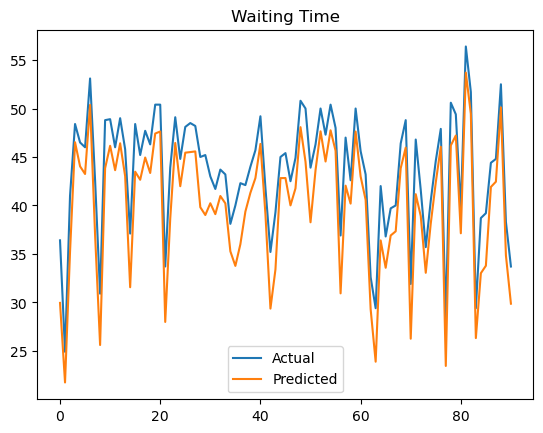

MAE : 3.529


In [29]:
# 모델 1번 시각화
final_model = model1

y_pred = final_model.predict(x_test)
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Waiting Time')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE : {round(mae,3)}')

## 성능 좋은 모델